<a href="https://colab.research.google.com/github/Bishawa/CardioVascularRiskPrediction/blob/main/Cardiovascular_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import missingno as msno
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, classification_report, accuracy_score, recall_score
from sklearn.model_selection import cross_validate

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/self practice/data_cardiovascular_risk.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

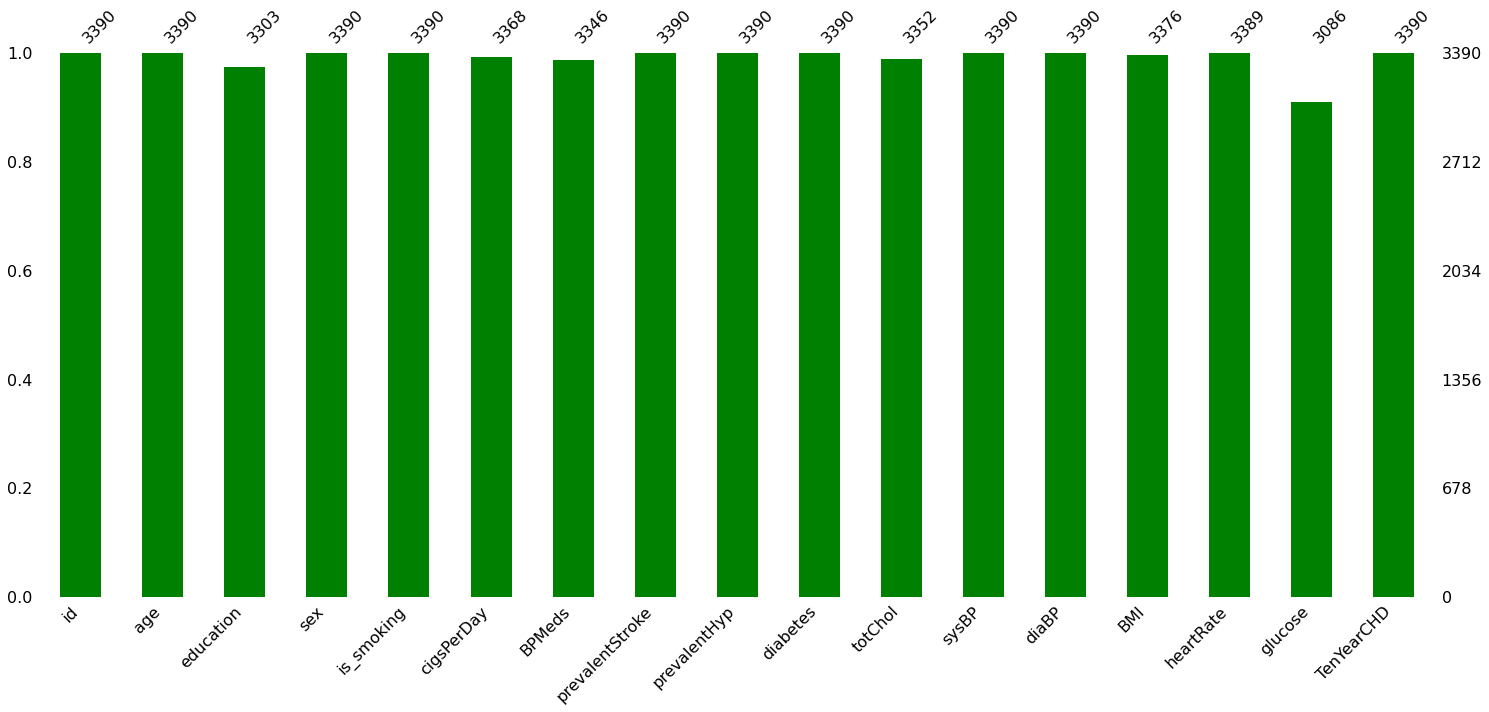

In [10]:
# Visualizing the missing values
msno.bar(df, color = 'green')

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df_columns_names = df.columns.to_list()

In [14]:
df_columns_names

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [15]:
for i in df_columns_names:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of id are: [   0    1    2 ... 3387 3388 3389]
The Unique Values of age are: [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
The Unique Values of education are: [ 2.  4.  1.  3. nan]
The Unique Values of sex are: ['F' 'M']
The Unique Values of is_smoking are: ['YES' 'NO']
The Unique Values of cigsPerDay are: [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
The Unique Values of BPMeds are: [ 0. nan  1.]
The Unique Values of prevalentStroke are: [0 1]
The Unique Values of prevalentHyp are: [0 1]
The Unique Values of diabetes are: [0 1]
The Unique Values of totChol are: [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [17]:
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [18]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [19]:
# label encoding for sex
df['sex'] = df['sex'].map(lambda x: 1 if x=='M' else 0)

In [20]:
df['sex'].value_counts()

0    1923
1    1467
Name: sex, dtype: int64

In [21]:
# label encoding for is_smoking
df['is_smoking'] = df['is_smoking'].map(lambda x: 1 if x=='YES' else 0)

In [22]:
df.is_smoking.value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

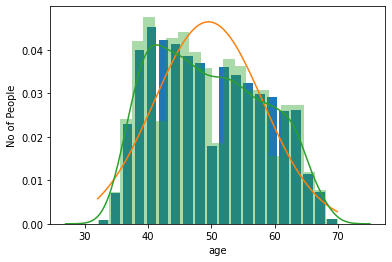

In [24]:
# Chart - 1 visualization code
# sns.scatterplot(data = df_new, x =df['age'], y= 'TenYearCHD')
plt.hist(df['age'], bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Age')
plt.ylabel('No of People')
rng = np.arange(df.age.min(), df.age.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.age.mean(), df.age.std()))
sns.distplot(df.age)
plt.show()

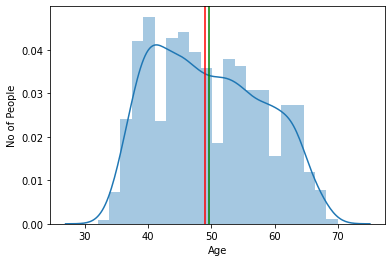

In [25]:
# Chart - 1 visualization code
sns.distplot(df['age'])
plt.axvline(df['age'].mean(), color = 'Green')
plt.axvline(df['age'].median(), color = 'Red')
# plt.axvline(df['age'].mode(), color = 'Pink')
plt.xlabel('Age')
plt.ylabel('No of People')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

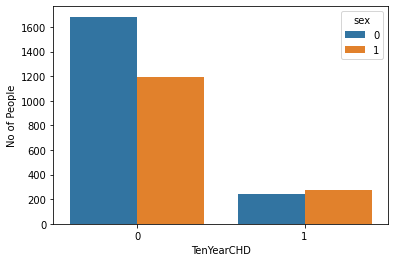

In [26]:
# Chart - 2 visualization code
sns.countplot(df['TenYearCHD'], hue = df['sex'])
plt.xlabel('TenYearCHD')
plt.ylabel('No of People')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

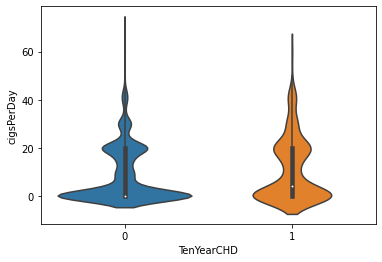

In [27]:
# Chart - 3 visualization code
sns.violinplot(data = df, x = df['TenYearCHD'], y = df['cigsPerDay'])

In [28]:
df[df['cigsPerDay'] >= 60]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
42,42,39,1.0,1,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0
76,76,37,4.0,1,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0
482,482,49,2.0,1,1,60.0,0.0,0,0,0,213.0,123.0,75.0,24.84,70.0,NaN,1
869,869,58,2.0,1,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0
1774,1774,46,1.0,1,1,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.0,0
2075,2075,59,1.0,1,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0
2222,2222,48,NaN,1,1,60.0,0.0,0,0,0,232.0,136.0,81.0,25.83,80.0,78.0,0
2985,2985,40,3.0,1,1,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0
3374,3374,67,2.0,1,1,60.0,0.0,0,1,0,261.0,170.0,100.0,22.71,72.0,79.0,1


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

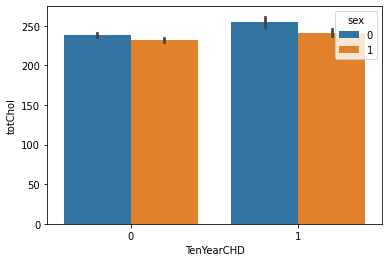

In [29]:
# Chart - 4 visualization code
sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue = df['sex'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

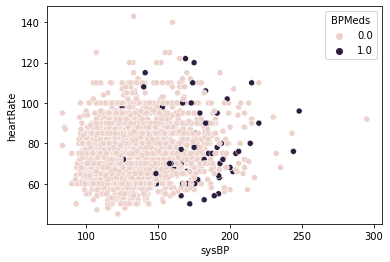

In [30]:
# Chart - 5 visualization code
sns.scatterplot(df['sysBP'], df['heartRate'], hue = df['BPMeds'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

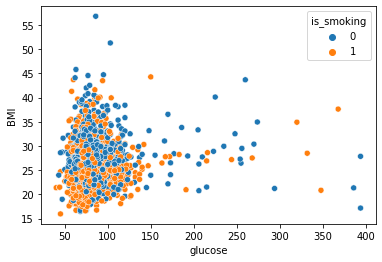

In [31]:
# Chart - 6 visualization code
sns.scatterplot(df['glucose'], df['BMI'], hue = df['is_smoking'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

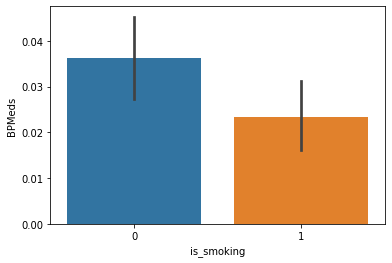

In [32]:
# Chart - 7 visualization code
sns.barplot(df['is_smoking'], df['BPMeds'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

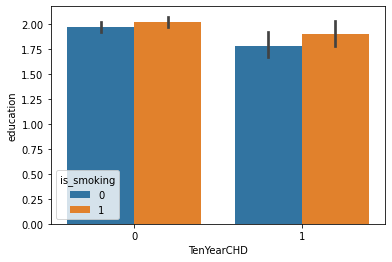

In [33]:
# Chart - 8 visualization code
sns.barplot(df['TenYearCHD'], df['education'], hue= df['is_smoking'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

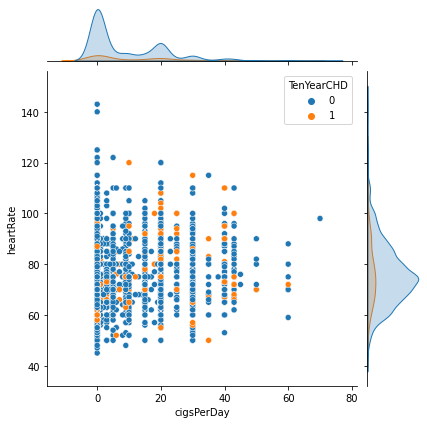

In [34]:
# Chart - 9 visualization code
sns.jointplot(df['cigsPerDay'], df['heartRate'], hue = df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Figure size 2520x1080 with 0 Axes>

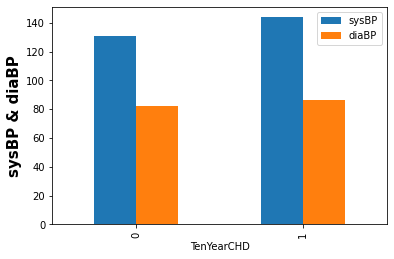

In [35]:
# Chart - 10 visualization code
plt.figure(figsize=(35,15))
ax = df.groupby('TenYearCHD')[['sysBP', 'diaBP']].mean().plot(kind = 'bar')
ax.set_ylabel('sysBP & diaBP',size=15,fontdict={"weight": "bold"})
ax.set_xticks([0, 1])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [36]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [37]:
# Chart - 11 visualization code
rmdf={'y':df['sysBP'],'x':df['diaBP']}
rmdf=pd.DataFrame(rmdf)
rmdf['x2']= rmdf['x']**2
rmdf['xy']= rmdf['x']*rmdf['y']

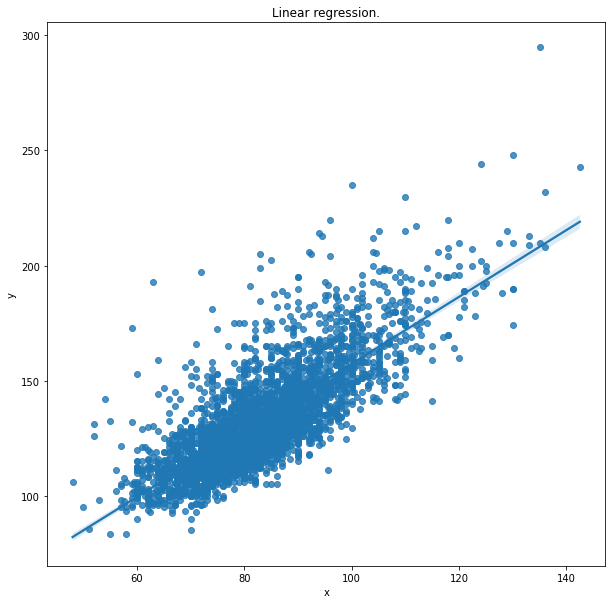

In [38]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('diaBP')
plt.ylabel('sysBP')
sns.regplot(x=rmdf['x'],y=rmdf['y'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

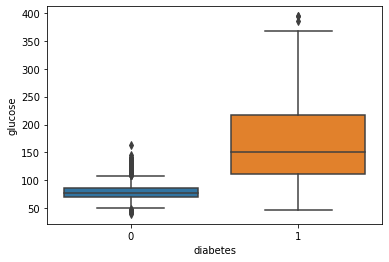

In [39]:
# Chart - 12 visualization code
sns.boxplot(df['diabetes'], df['glucose'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

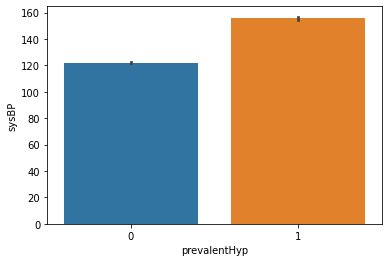

In [40]:
# Chart - 13 visualization code
sns.barplot(df['prevalentHyp'], df['sysBP'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

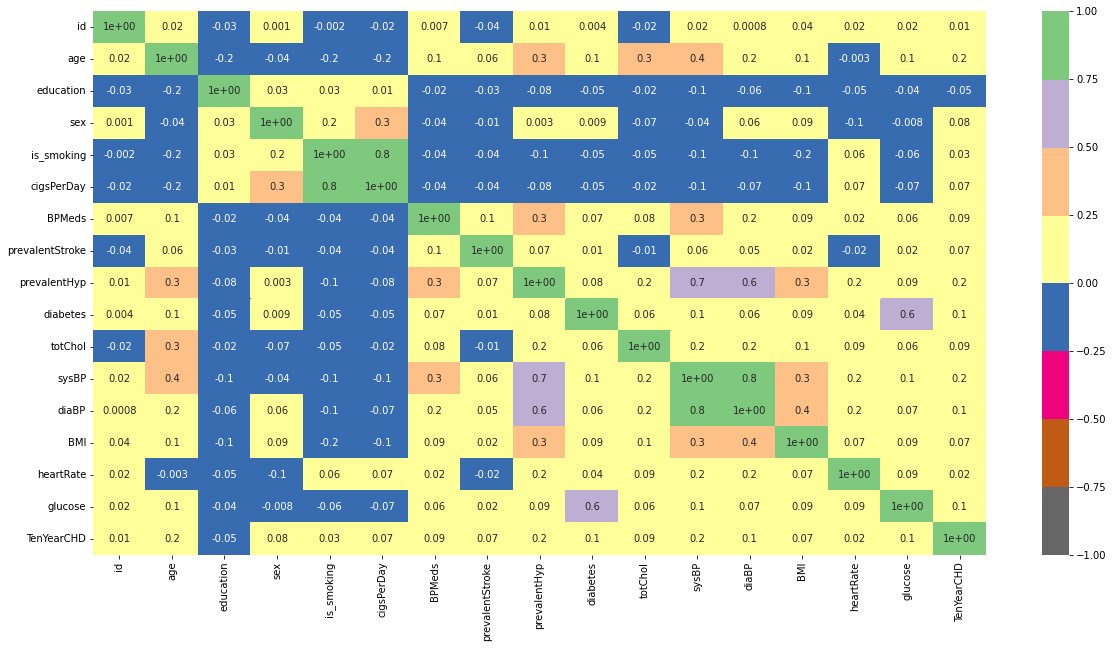

In [41]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmax=1, vmin = -1, cmap='Accent_r', annot = True, fmt='.1')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

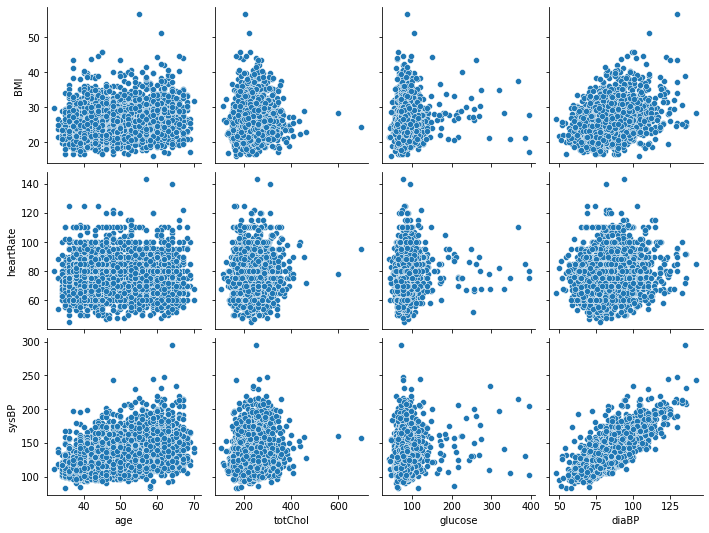

In [42]:
sns.pairplot(data = df, x_vars=['age', 'totChol','glucose','diaBP'], y_vars = ['BMI', 'heartRate', 'sysBP'], kind = 'scatter')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [47]:
df.cigsPerDay.value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [48]:
# Handling the missing values of education column using mode
df['education'].fillna(df.education.mode()[0], inplace = True)

In [49]:
# Handling the missing values of cigsPerDay column using mean
df['cigsPerDay'].fillna(df.cigsPerDay.mean(), inplace = True)

In [50]:
# Handling the missing values of BPMeds column using mode
df['BPMeds'].fillna(df.BPMeds.mode()[0], inplace = True)

In [51]:
# Handling the missing values of totChol column using mean
df['totChol'].fillna(df.totChol.mean(), inplace = True)

In [52]:
# Handling the missing values of BMI column using median
df['BMI'].fillna(df.BMI.median(), inplace = True)

In [53]:
# Handling the missing values of heartRate column using median
df['heartRate'].fillna(df.heartRate.median(), inplace = True)

In [54]:
# Handling the missing values of heartRate column using mean
df['glucose'].fillna(df.glucose.mean(), inplace = True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [55]:
# Creating box plot for all nemerical variables 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   int64  
 4   is_smoking       3390 non-null   int64  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [57]:
#Resetting the index 
df.set_index('id', inplace = True)

In [58]:
df['BPMeds'] = df['BPMeds'].astype('int64')

In [59]:
df['education'] = df['education'].astype('int64')

In [60]:
df['age'] = df['age'].astype('float64')

In [61]:
int_features = []
cat_features = []
float_features = []
for i in df.columns:
  if df[i].dtype == 'float64':
    float_features.append(i)
  elif df[i].dtype == 'int64':
    int_features.append(i)
  elif df[i].dtype == 'object':
    cat_features.append(i) 


In [62]:
int_features

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [63]:
float_features

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [64]:
numerical_features = df.columns.tolist()
numerical_features

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [65]:
numerical_features.remove('TenYearCHD')

In [66]:
numerical_features 

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

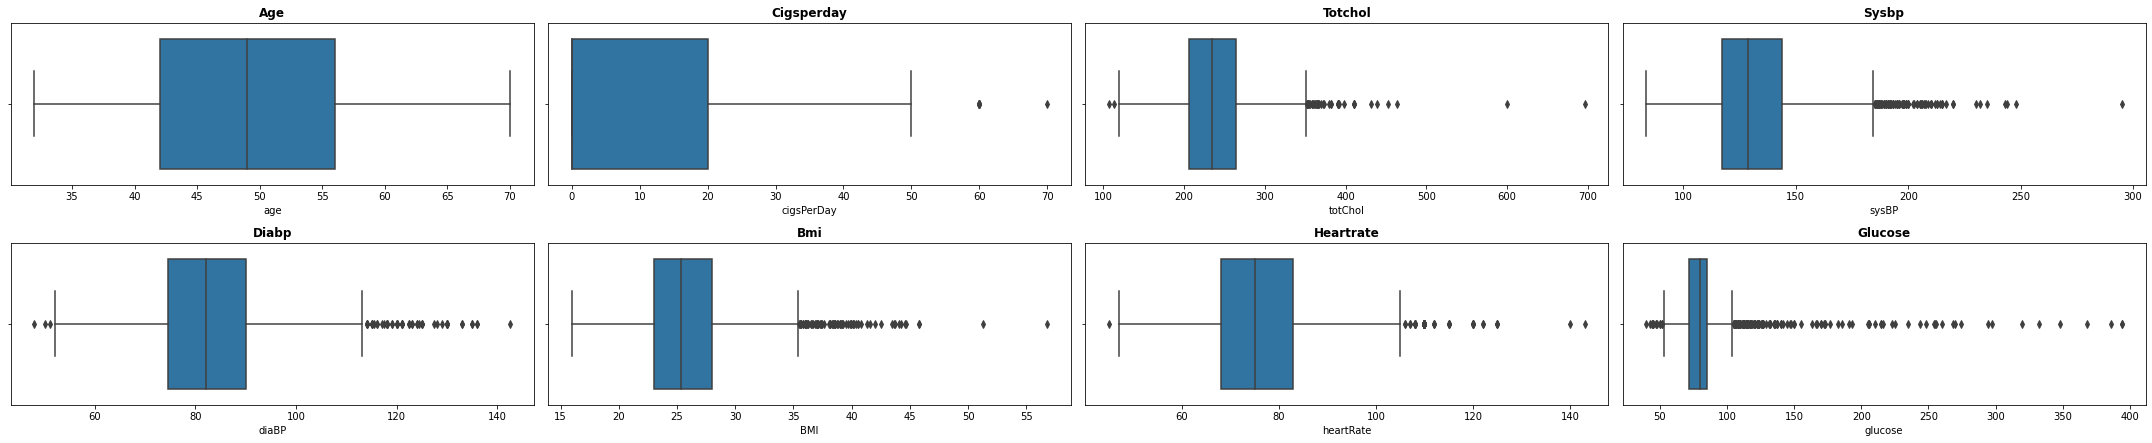

In [67]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(30,15))
for n,column in enumerate(float_features):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

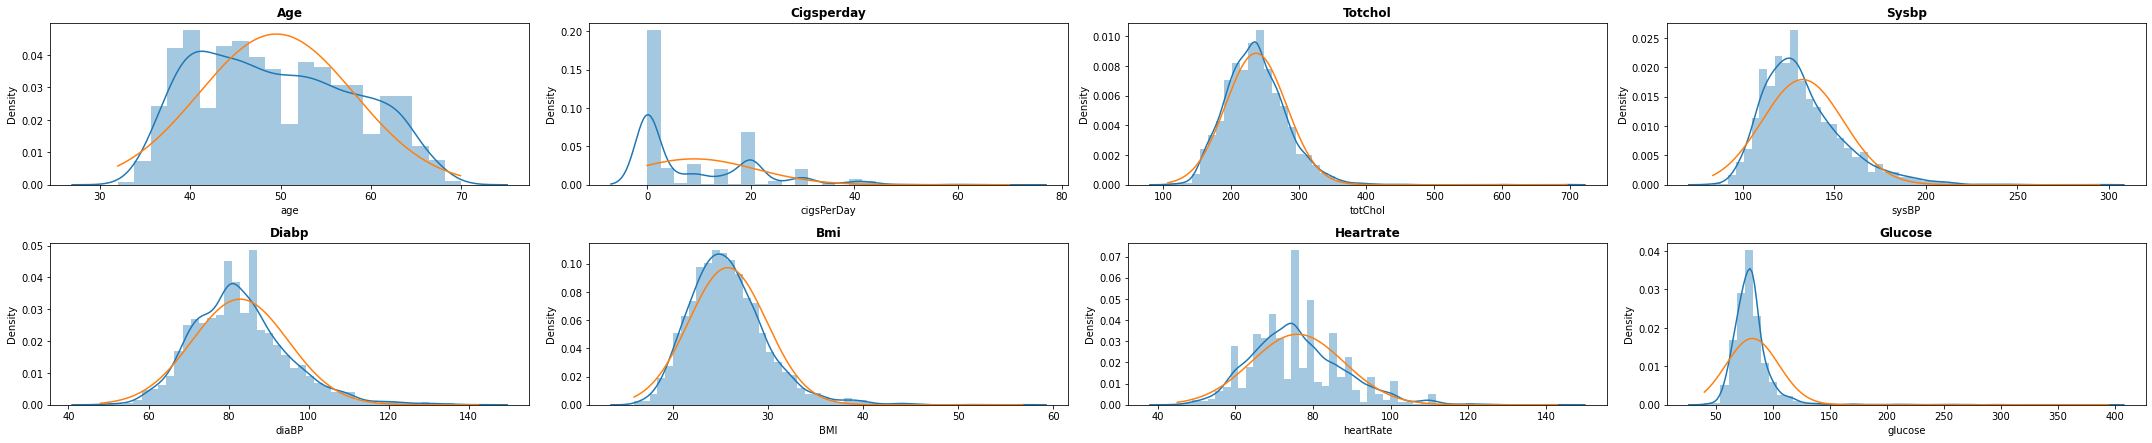

In [68]:
from scipy.stats import norm
plt.figure(figsize=(30,15))
for n,column in enumerate(float_features):
  plt.subplot(5, 4, n+1)
  sns.distplot(df[column])
  rng = np.arange(df[column].min(), df[column].max(), 0.1)
  plt.plot(rng, norm.pdf(rng, df[column].mean(), df[column].std()))
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [69]:
df1 = df.copy()

In [70]:
# Outlier removal for 'totChol'
Q1 = df1.totChol.quantile(0.25)
Q3 = df1.totChol.quantile(0.75)
IQR = Q3 - Q1
a = Q1 - (1.5 * IQR)
b = Q3 + (1.5 * IQR)
df1 = df1.loc[(df1['totChol'] > a) & (df1['totChol']<b)]

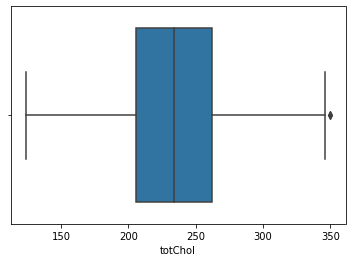

In [71]:
sns.boxplot(df1['totChol'])
plt.show()

In [72]:
# Outlier removal for 'heartRate'
Q1 = df1.heartRate.quantile(0.25)
Q3 = df1.heartRate.quantile(0.75)
IQR = Q3 - Q1
a = Q1 - (1.5 * IQR)
b = Q3 + (1.5 * IQR)
df1 = df1.loc[(df1['heartRate'] > a) & (df1['heartRate']<b)]

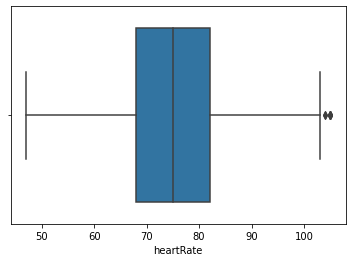

In [73]:
sns.boxplot(df1['heartRate'])

In [74]:
# Outlier removal for 'glucose'
Q1 = df1.glucose.quantile(0.25)
Q3 = df1.glucose.quantile(0.75)
IQR = Q3 - Q1
a = Q1 - (1.5 * IQR)
b = Q3 + (1.5 * IQR)
df1 = df1.loc[(df1['glucose'] > a) & (df1['glucose']<b)]

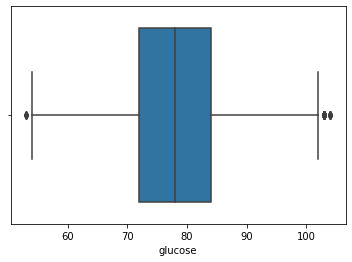

In [75]:
sns.boxplot(df1['glucose'])

In [76]:
# Outlier removal for 'cigsPerDay'
Q1 = df1.cigsPerDay.quantile(0.25)
Q3 = df1.cigsPerDay.quantile(0.75)
IQR = Q3 - Q1
a = Q1 - (1.5 * IQR)
b = Q3 + (1.5 * IQR)
df1 = df1.loc[(df1['cigsPerDay'] > a) & (df1['cigsPerDay']<b)]

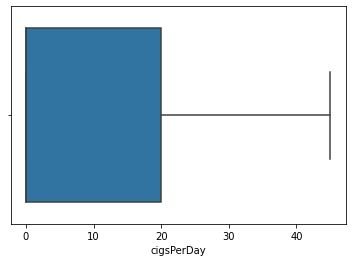

In [77]:
sns.boxplot(df1.cigsPerDay)

In [78]:
# Outlier removal for 'sysBP'
Q1 = df1.sysBP.quantile(0.25)
Q3 = df1.sysBP.quantile(0.75)
IQR = Q3 - Q1
a = Q1 - (1.5 * IQR)
b = Q3 + (1.5 * IQR)
df1 = df1.loc[(df1['sysBP'] > a) & (df1['sysBP']<b)]

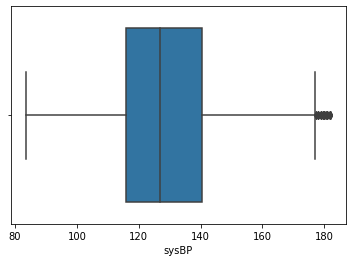

In [79]:
sns.boxplot(df1['sysBP'])

In [80]:
# Outlier removal for 'diaBP'
Q1 = df1.diaBP.quantile(0.25)
Q3 = df1.diaBP.quantile(0.75)
IQR = Q3 - Q1
a = Q1 - (1.5 * IQR)
b = Q3 + (1.5 * IQR)
df1 = df1.loc[(df1['diaBP'] > a) & (df1['diaBP']<b)]

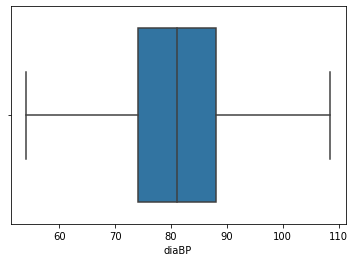

In [81]:
sns.boxplot(df1['diaBP'])

In [82]:
# Outlier removal for 'BMI'
Q1 = df1.BMI.quantile(0.25)
Q3 = df1.BMI.quantile(0.75)
IQR = Q3 - Q1
a = Q1 - (1.5 * IQR)
b = Q3 + (1.5 * IQR)
df1 = df1.loc[(df1['BMI'] > a) & (df1['BMI']<b)]

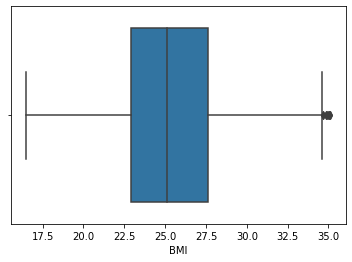

In [83]:
sns.boxplot(df1['BMI'])

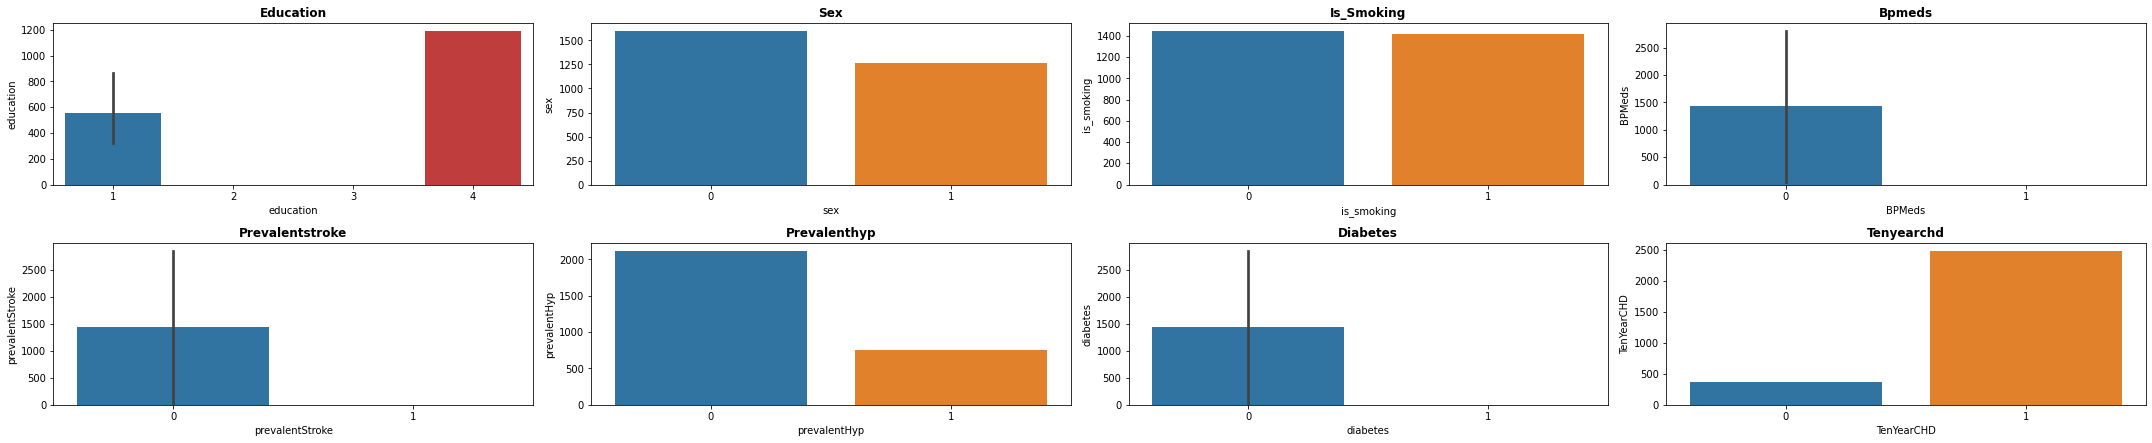

In [84]:
plt.figure(figsize=(30,15))
for n,column in enumerate(int_features):
  plt.subplot(5, 4, n+1)
  sns.barplot(x= df1[column], y = df1[column].value_counts())
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

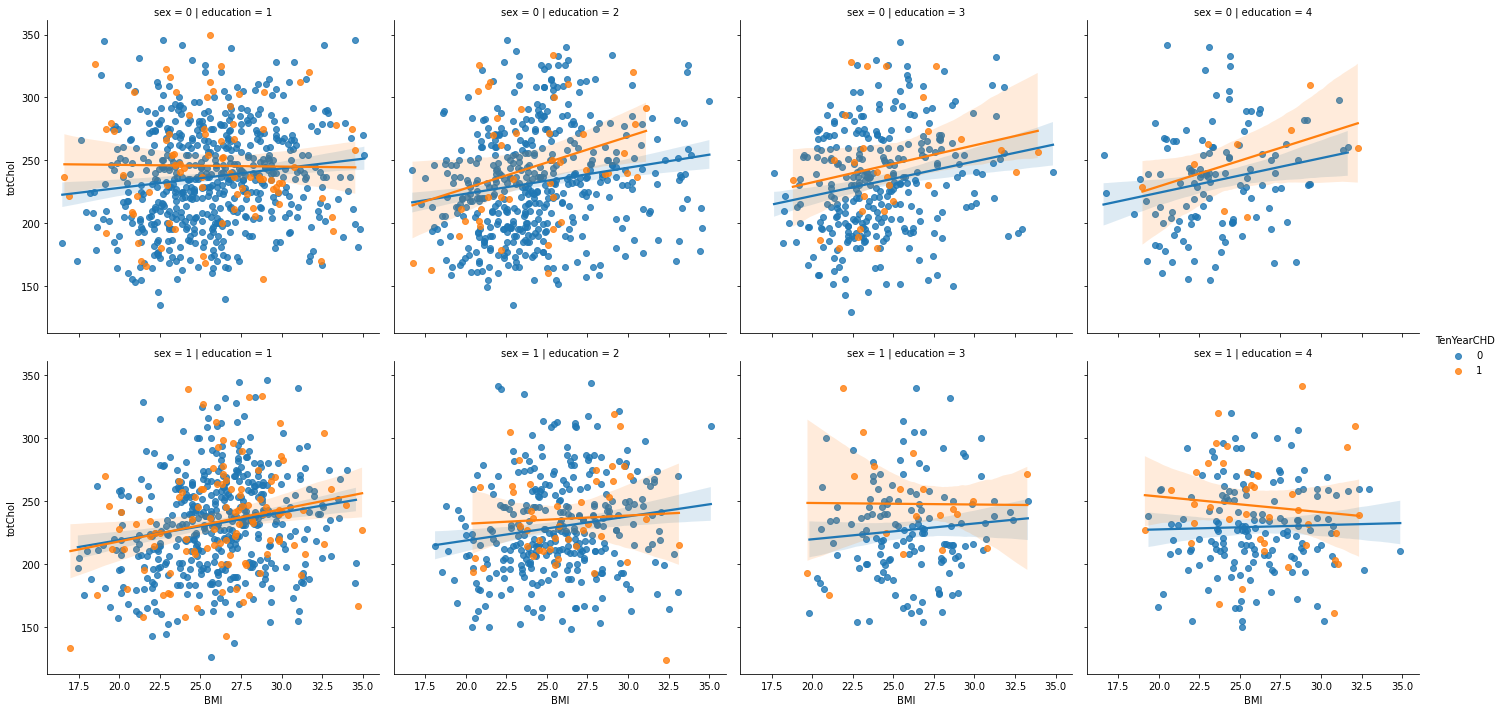

In [85]:
sns.lmplot(data = df1, x = 'BMI', y='totChol', hue = 'TenYearCHD', col = 'education', row = 'sex')

In [86]:
df1['BPMeds'].value_counts()

0    2810
1      56
Name: BPMeds, dtype: int64

In [87]:
df1['diabetes'].value_counts()

0    2851
1      15
Name: diabetes, dtype: int64

In [88]:
numerical_features

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [89]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [90]:
# Expand Contraction

#### 2. Lower Casing

In [91]:
# Lower Casing

#### 3. Removing Punctuations

In [92]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [93]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [94]:
# Remove Stopwords

In [95]:
# Remove White spaces

#### 6. Rephrase Text

In [96]:
# Rephrase Text

#### 7. Tokenization

In [97]:
# Tokenization

#### 8. Text Normalization

In [98]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [99]:
# POS Taging

#### 10. Text Vectorization

In [100]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [101]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [102]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [103]:
# Transform Your data

### 6. Data Scaling

In [104]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [105]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [106]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df1[numerical_features]
y = df1['TenYearCHD']

In [107]:
X.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
id,,,,,,,,,,,,,,,
0,64.0,2,0,1,3.0,0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0
1,36.0,4,1,0,0.0,0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46.0,1,0,1,10.0,0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50.0,1,1,1,20.0,0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64.0,1,0,1,30.0,0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [108]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print(X_train.shape)
print(X_test.shape)

(2292, 15)
(574, 15)


In [109]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit(X_test)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [110]:
# Handling Imbalanced Dataset (If needed)
df1['TenYearCHD'].value_counts()

0    2489
1     377
Name: TenYearCHD, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We will adopt the penalise algorithm method to handle the data imbalance.

## ***7. ML Model Implementation***

In [111]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):



  # Fitting the model
  model.fit(X_train,y_train)

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = numerical_features
    except:
      importance = np.abs(model.coef_[0])
      feature = numerical_features
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
    plt.title(f'{label} Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model



```
# This is formatted as code
```

### ML Model - 1 - Logostic Regression 

In [ ]:
# ML Model - 1 Implementation

reg_logistic = LogisticRegression(fit_intercept= True, max_iter = 10000, class_weight='balanced').fit(X_train , y_train)



In [ ]:
# Predict on the model
train_pred = reg_logistic.predict(X_train)
test_pred = reg_logistic.predict(X_test)
train_pred_proba = reg_logistic.predict_proba(X_train)[:, 1]
test_pred_proba = reg_logistic.predict_proba(X_test)[:, 1]

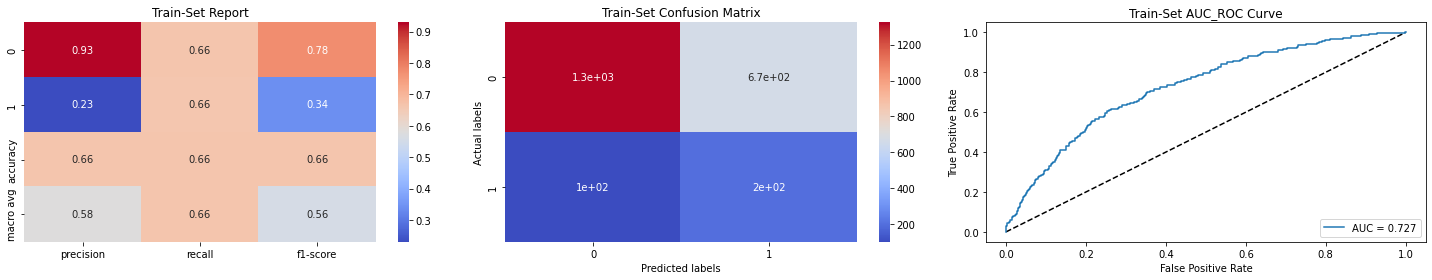

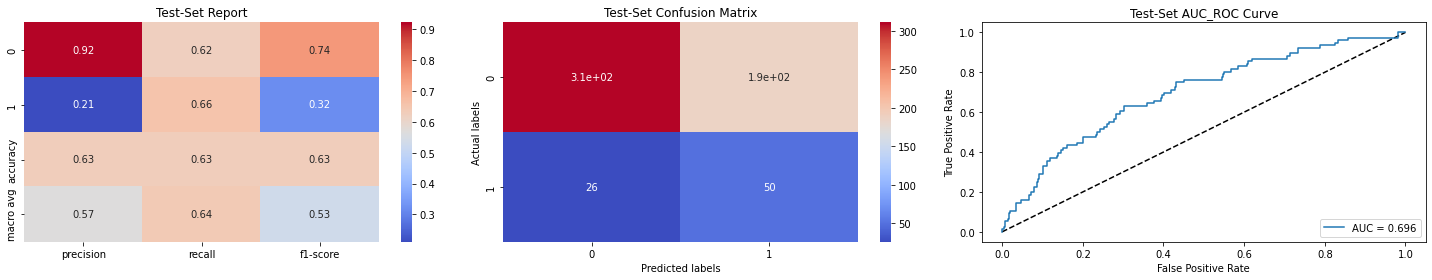

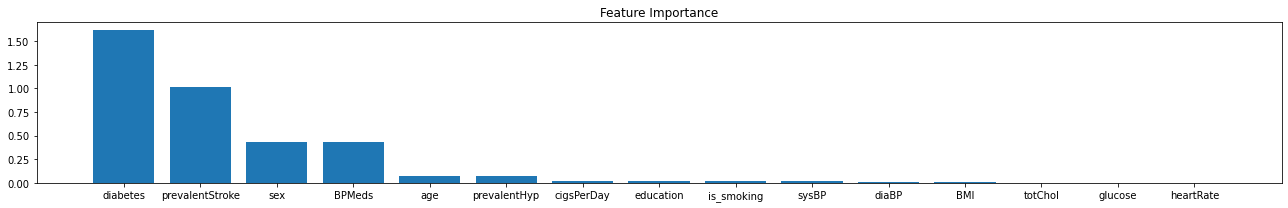

LogisticRegression(class_weight='balanced', max_iter=10000)

In [ ]:
analyse_model(reg_logistic, X_train, X_test, y_train, y_test)

In [ ]:
reg_logistic.intercept_

array([-6.57201892])

In [ ]:
reg_logistic.coef_

array([[ 7.45195442e-02, -2.39122380e-02,  4.35133590e-01,
         2.08465694e-02,  2.44332890e-02,  4.28496905e-01,
         1.01127930e+00, -7.21781642e-02, -1.61691220e+00,
         2.03736554e-03,  1.76261689e-02, -5.39773064e-03,
        -4.58341683e-03,  2.09366311e-04,  1.28956086e-03]])

In [ ]:
print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.6649214659685864
0.6289198606271778


In [ ]:
threshold = 0.5

In [ ]:
reg_logistic.predict_proba(X_test)[:,1]> threshold

In [ ]:
# We are converting the predicted values as 0 and 1 
X_test_imputed = (reg_logistic.predict_proba(X_test)[:,1]> threshold).astype(int)

In [ ]:
X_test_imputed

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74       498
           1       0.21      0.66      0.32        76

    accuracy                           0.63       574
   macro avg       0.57      0.64      0.53       574
weighted avg       0.83      0.63      0.69       574



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
scoring = ['recall']
logistic_cv = LogisticRegression()
scores = cross_validate(logistic_cv, X_train, y_train, scoring = scoring, cv = 5, return_train_score = True, return_estimator= True, verbose = 10)
# Fit the Algorithm

# Predict on the model

In [ ]:
test_recall = recall_score(test_pred, y_test)
train_recall = recall_score(train_pred, y_train)

In [ ]:
scores['test_recall']

In [ ]:
scores['train_recall']

In [ ]:
scores['estimator']

In [ ]:
for model in scores['estimator']:
  print(model.coef_)

In [ ]:
scores.best_estimator_

AttributeError: ignored

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***